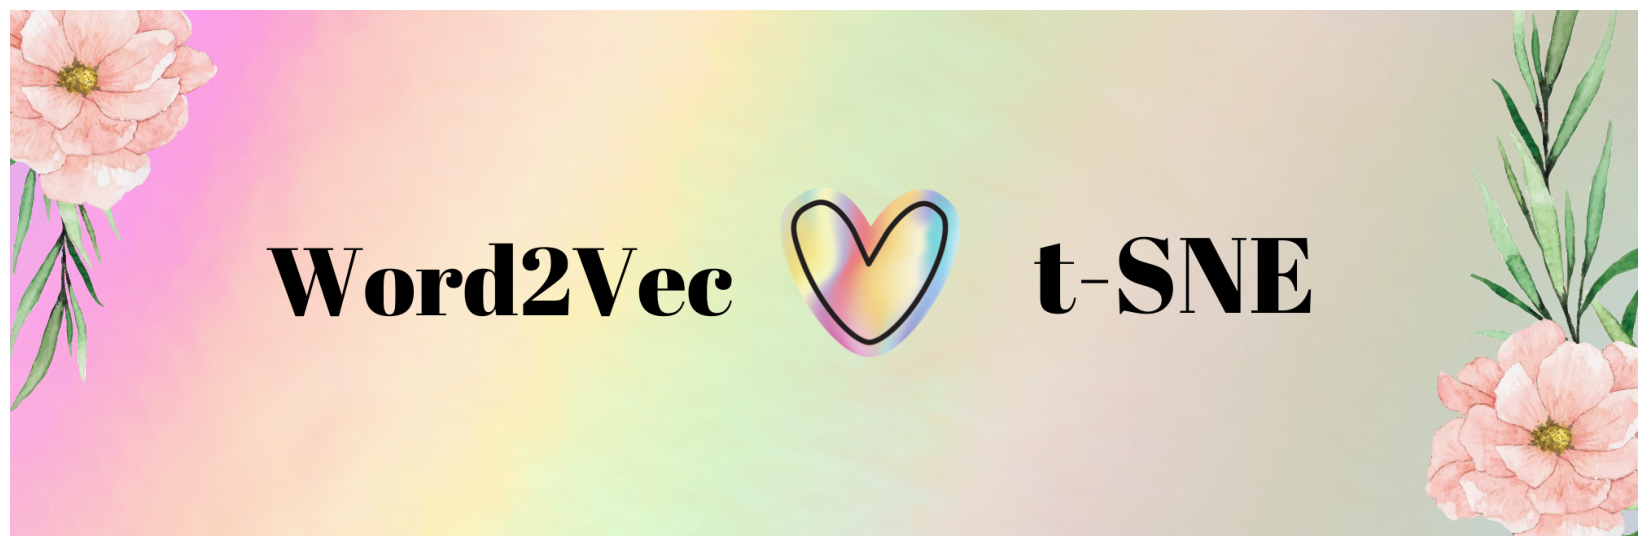

In [1]:
import PIL
import urllib
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(21,7))
plt.axis(False)
plt.imshow(
    np.array(
        PIL.Image.open(
            urllib.request.urlopen(
                "https://user-images.githubusercontent.com/57945364/172929241-15296cd2-2441-45ce-b6ac-b286c80bc29f.png"
            )
        )
    )
)

# What will we learn?
* How to **scrape** content form any URL using **BeautifulSoup (bs4)**
* Implement **Word2Vec** using **gensim** library
* What is **t-SNE** and how is it different form other algorithms
* **Visualize** the embedings using **Plotly**

###  Hold on..
Before diving into learning the practical implementation, let us first strengthen the theoritical concepts.
* [Theory](#theory)
    1. [BeautifulSoup](#theory)
    2. [Word2Vec](#w2v)
    3. [t-SNE](#tsne)

Well, incase you want to skip to practical, here you go!
* [Practical Implementation](#prac)
    1. [Content 1:](#prac) Scraped - clean - embed - visualize
    2. [Content 2:](#c2) Embed - visualize - experiment

<a id="theory"></a>
# Concepts
## 1. BeautifulSoup
<!-- <p style="text-align:center;"><img src="https://stackabuse.s3.amazonaws.com/media/parsing-html-with-beautifulsoup-in-python-1.jpg" width="50%"></p> -->
<p><img src="https://stackabuse.s3.amazonaws.com/media/parsing-html-with-beautifulsoup-in-python-1.jpg" width="50%"></p>
<h6>Credits: stackabuse</h6>

Web Scraping is the process of collecting data from the internet by using various tools and frameworks. Beautiful Soup is a Python library that is used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner.

Few advantages:
1. Very fast
2. Extremely lenient
3. Parses pages the same way a Browser does
4. Prettify the Source Code

Install:

```pip install beautifulsoup4```

Import:

``` from bs4 import BeautifulSoup```
<a id="w2v"></a>
## 2. Word2Vec

Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

Word2vec’s applications extend beyond parsing sentences in the wild. It can be applied just as well to genes, code, likes, playlists, social media graphs and other verbal or symbolic series in which patterns may be discerned.

Why? Because words are simply discrete states like the other data mentioned above, and we are simply looking for the transitional probabilities between those states: the likelihood that they will co-occur. 

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words. It does so without human intervention.

Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic. Those clusters can form the basis of search, sentiment analysis and recommendations in such diverse fields as scientific research, legal discovery, e-commerce and customer relationship management.

The output of the Word2vec neural net is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning net or simply queried to detect relationships between words.

[To know more on Word2Vec, click me :)](https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1)
<a id="tsne"></a>
## 3. t-SNE

I have been comparing dimensionality reduction techniques like PCA and FLDA in [my notebook](https://www.kaggle.com/code/aneridalwadi/pca-fisher-s-lda).
One of those algorithms is called t-SNE. 

You might ask “Why I should even care? I know PCA already!”, and that would be a great question. t-SNE is something called nonlinear dimensionality reduction. What that means is this algorithm allows us to separate data that cannot be separated by any straight line, let me show you an example:

<img src="https://user-images.githubusercontent.com/57945364/172662382-88820672-0d2c-477b-819a-ad7394f28b50.png" width="55%">

**What is exactly t-SNE?**

t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data based on the similarity of data points with features, the similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbour. 
It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in 2 or 3 dimensional space. 

The nearest neighbor accuracy gives the probability that a random point has the same species as its closest neighbor. This would be close to 100% if the points were perfectly grouped according to their species. A high nearest neighbor accuracy implies that the data can be cleanly separated into groups.

**Any parameters?**

There are many, but here we will be understanding and implementing an arguably important parameter of t-SNE: **perplexity**

Perplexity is perhaps the most important parameter in t-SNE and can reveal different aspects of the data. Considered loosely, it can be thought of as the balance between preserving the global and the local structure of the data. A more direct way to think about perplexity is that it is the continuous analogy to the KNN (K-Nearest Neighbors) for which we will preserve distances.

In most implementations, perplexity defaults to 30. This focuses the attention of t-SNE on preserving the distances to its 30 nearest neighbors and puts virtually no weight on preserving distances to the remaining points. For data sets with a small number of points e.g. 100, this will uncover the global structure quite well since each point will preserve distances to a third of the data set.

For larger data sets, e.g. 10,000 points, considering 30 nearest neighbors will likely do a poor job of preserving global structure. Using a higher perplexity value e.g. 500, will do a much better job for of uncovering the global structure. For larger data sets still e.g. 500k or 1 million samples, this is typically not enough and can take quite a long time to run. Luckily, various tricks can be used to improve global structure

[To know more on T-SNE, click me :)](https://www.youtube.com/watch?v=NEaUSP4YerM)

<a id="prac"></a>
# **Practical implementation**
## 1. Scraped - clean - embed - visualize

Imports

In [2]:
!pip install gensim

In [3]:
import re
import nltk
import bs4 as bs
import numpy as np
import urllib.request
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import word2vec

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Scrape the data

In [4]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data.read()

parsed_article = bs.BeautifulSoup(article, 'lxml')

# Since wikipedia stores the textual data we need in `p` tags, 
# we extract the data using find_all('p')
paragraphs = parsed_article.find_all('p')


# append the paragraphs in article_text
article_text = ""
for p in paragraphs:
    article_text += p.text

Text cleaning

In [5]:
# Convert the data to uniform case
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]


Declare model for word2vec

To train your own model you can visite this [site](https://radimrehurek.com/gensim/models/word2vec.html)

In [6]:
model = word2vec.Word2Vec(all_words, min_count=2, workers=4)

In [7]:
# we use wv to get the vector ouput for a given word
demo_wv_vector = model.wv["ai"]
demo_wv_vector 

array([-0.00551337,  0.00961267,  0.00796117,  0.00977565, -0.00706558,
       -0.02274412,  0.01198163,  0.0312735 , -0.00925442, -0.0051758 ,
        0.00106235, -0.01280547, -0.00516949,  0.00827676, -0.00224932,
       -0.00886093,  0.00216728, -0.00974253, -0.00677626, -0.02691456,
        0.01427914,  0.0103204 ,  0.00982736, -0.00464402,  0.00262087,
       -0.00383491, -0.00851035, -0.00333324, -0.01380973, -0.00330142,
        0.00400473,  0.00339284,  0.01200967, -0.00628089, -0.0054399 ,
        0.00739682,  0.00680707, -0.01320156, -0.00715439, -0.02139606,
       -0.01047995,  0.00103349, -0.01108756, -0.00383532,  0.00685485,
        0.00035459, -0.01159642,  0.00751303,  0.01191734,  0.01284533,
       -0.00275656, -0.00247563, -0.00408443,  0.00013651,  0.00118345,
        0.00245992,  0.00859936, -0.00888996, -0.01654223,  0.01078652,
        0.00097332,  0.0028206 , -0.00660873, -0.01298806, -0.01396827,
        0.00687488,  0.00250996,  0.01436813, -0.01267379,  0.01

In [8]:
demo_wv_vector.shape

(100,)

Lets see how the ```t-SNE``` plots our data with varying ```min_count``` parameter in training our ```word2vec``` model

In [9]:
def tsne_plot():
    labels = []
    tokens = []
    
    # Extracting words and their vectors from our trained model 
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # Train t-SNE 
    tsne_model = TSNE(perplexity=45, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")
    plt.show()

In [10]:
# Words that occur atleast 20 times
model = word2vec.Word2Vec(all_words, window=20, min_count=20, workers=4)
tsne_plot()

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Words that occur atleast 2 times
model = word2vec.Word2Vec(all_words, window=20, min_count=2, workers=4)
tsne_plot()

It gets more and more **difficult to read** as the size of dataset increases 😵

Hence, for **semantic retention** and better inferences, we will plot only the **similar words** to a chosen key.

Word2Vector provides us with an inbuilt functionality to give the list of top similar words with respect to the cosine-distance💫

In [ ]:
# demo output
model.wv.most_similar('ai')

We see that it significantly shows semantically close words like ai-artificial, intelligence, machine etc..✅

For the basics, lets select 2 words and plot the similar words using t-SNE 

In [ ]:
keys = ['tech', 'ai']

# this array will contain the vectors(dimension 100) and the labels
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words chosen keys', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

You see how significantly t-SNE reduces the dimension form 100 to 2 with efficiently segregating the clusters!😍😍😍  

<a id="c2"></a>
## 2. Embed - visualize - experiment

As an input data for visualization, we will use articles from Google News and a few novels by Leo Tolstoy. Pre-trained vectors trained on part of Google News dataset (about 100 billion words) was published by Google at the [official page](https://code.google.com/archive/p/word2vec/), so we will use it.

Imports

In [20]:
import gensim.downloader as api
from sklearn.manifold import TSNE
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [21]:
#wv = api.load('/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/w2v-fr/wiki+medical_model.word2vec')
wv = Word2Vec.load("/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/cache/output_fr/ontology.embeddings")

In [22]:
word_vectors = wv.wv
print(word_vectors["schizophrénie"])

[ 0.00758294  0.2395544   0.33168587  0.63922966 -0.523911    0.36865777
  1.1672872   0.4535041  -0.2031541  -1.2154604   0.26554158 -1.5444498
  0.20878538 -0.99140686  1.8024784  -0.0383212   0.6935638   0.0258398
  0.14027053 -1.0108528   0.5448285   0.26925775 -0.30937892  0.55664176
 -0.9319155  -0.15032306 -0.0170061   0.24584955 -0.6012007   0.13094477
 -0.38148236 -0.41735843  0.31319407  0.55694515  1.0140091  -0.02412622
 -0.7761232  -0.29066744 -0.6856034  -0.26693326 -0.51927346  0.26253158
 -1.2475852  -0.96253103  0.30484074 -0.83836216 -0.66481066 -0.18165585
 -1.0363283   0.22787881 -1.507525   -0.5313266   0.41514015  0.2775238
  1.0303514  -0.34246036  0.24416377  0.00515891 -0.7720882  -0.45888308
  0.5819749  -0.9945376   0.4291288   0.09970108 -0.3404172  -0.237361
  1.5234611   0.05158111 -0.01099504 -0.01087873  0.2401108  -0.06897415
  0.70368403  0.0745537  -1.342923   -0.1307713  -0.60888803 -0.8828865
 -0.32420102 -0.4038518   0.22902516  0.58683455 -0.10358

In [23]:
# Lets check dimension of our vector
#wv["schizophrénie"].shape
#word_vectors.shape

Let's check if it works..

In [24]:
# Check for the similar words
wv.wv.most_similar("schizophrénie")

[('indifférenciée', 0.7647144198417664),
 ('http://data.esante.gouv.fr/atih/cim10/F20.8', 0.7578268051147461),
 ('http://data.esante.gouv.fr/atih/cim10/F20.9', 0.7476665377616882),
 ('schizophréniforme', 0.7462497353553772),
 ('http://data.esante.gouv.fr/atih/cim10/F20.6', 0.745433509349823),
 ('cénestopathique', 0.7415112853050232),
 ('rémittente', 0.7367889285087585),
 ('http://data.esante.gouv.fr/atih/cim10/F20.0', 0.7361388206481934),
 ('incomplète', 0.7347137928009033),
 ('http://data.esante.gouv.fr/atih/cim10/F20.3', 0.7321473956108093)]

Oh it very well does work. The outputs are quiet impressively accurate too. 

Lets jump into visualization:

In [25]:
# Select few keys 
keys = ['http://www.limics.fr/ontologies/ontoDOME#XANAX','http://www.limics.fr/ontologies/ontoDOME#PortionDeMedicament', 'http://www.limics.fr/ontologies/ontoDOPSY#ContactMediocre_signe','http://www.limics.fr/ontologies/ontoDOME#ProblemeDeSante', 'http://data.esante.gouv.fr/atih/cim10/F22', 'http://www.limics.fr/ontologies/ontoDOME#VarSOCIODEMOquali', 'http://www.limics.fr/ontologies/ontoDOPSY#DecesAutreParentAmiProche', 'http://www.limics.fr/ontologies/ontoDOME#RoleIngenieur',"schizophrénie" ,'xanax', 'schizophrénie','http://www.limics.fr/ontologies/ontoDOME#estUnProcheDe' ,'frère','fugue', 'docteur']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    
    # Get and store similar words and their vectors
    similar_words = wv.wv.most_similar(word, topn=30)
    for similar_word, _ in similar_words:
        words.append(similar_word)
        embeddings.append(wv.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


In [26]:
embedding_clusters = np.array(embedding_clusters)
# Eembedding_clusters is a 3D array
    # dim 1: all the words in rows
    # dim 2: the clumns are filled with the similar words
    # dim 3: the vectr of length 300
    
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

Plot

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/186123858.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


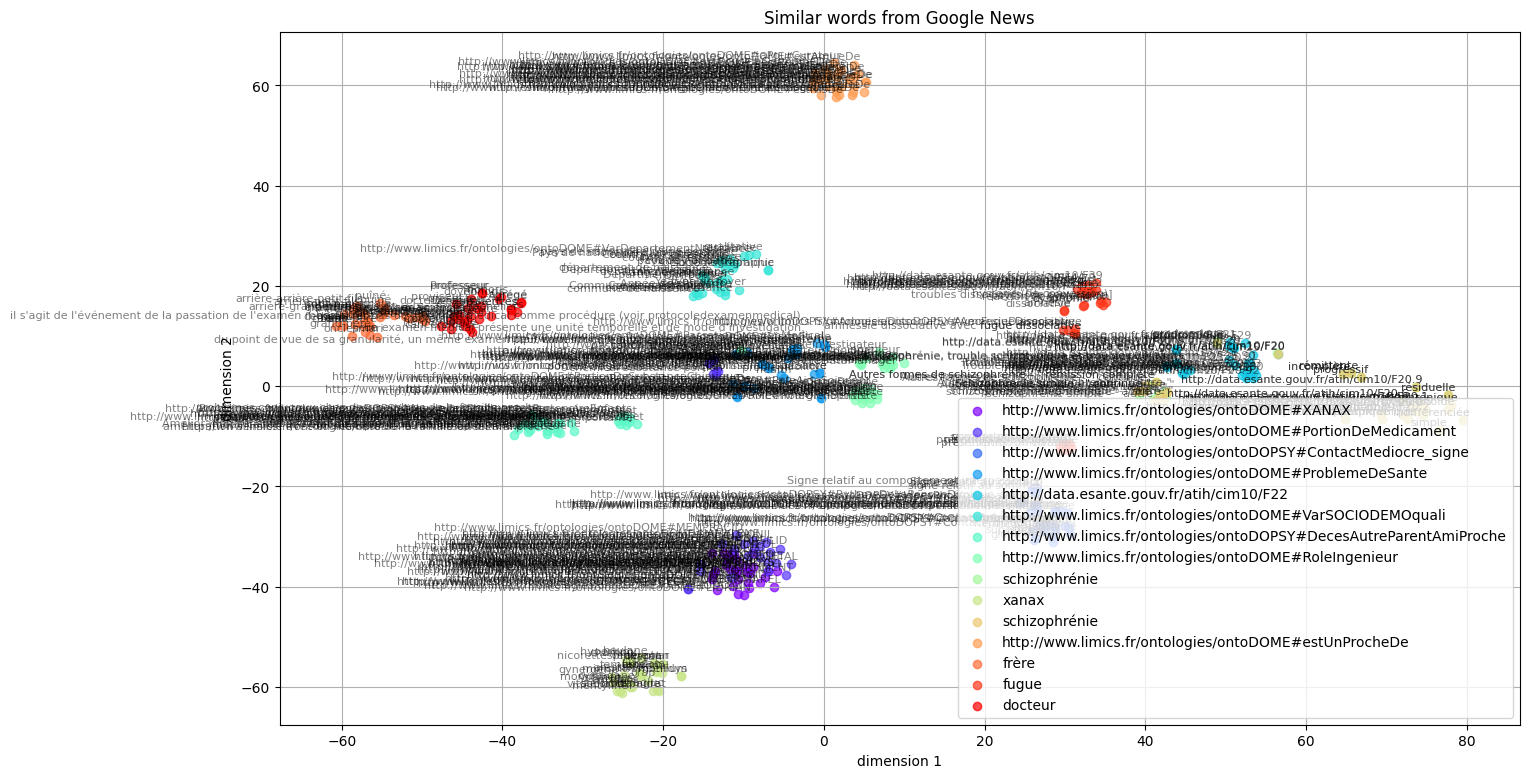

In [27]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

Isn't it fascinating to see how t-SNE reduces the dimension from 300 to 2 by retaining the cluster property this accurately! 😍😍😍 

(Note🧘: Well, the results might vary depending on the data. It is important to know your data to apply correct dimensionality model to get great outputs)

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/776697479.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


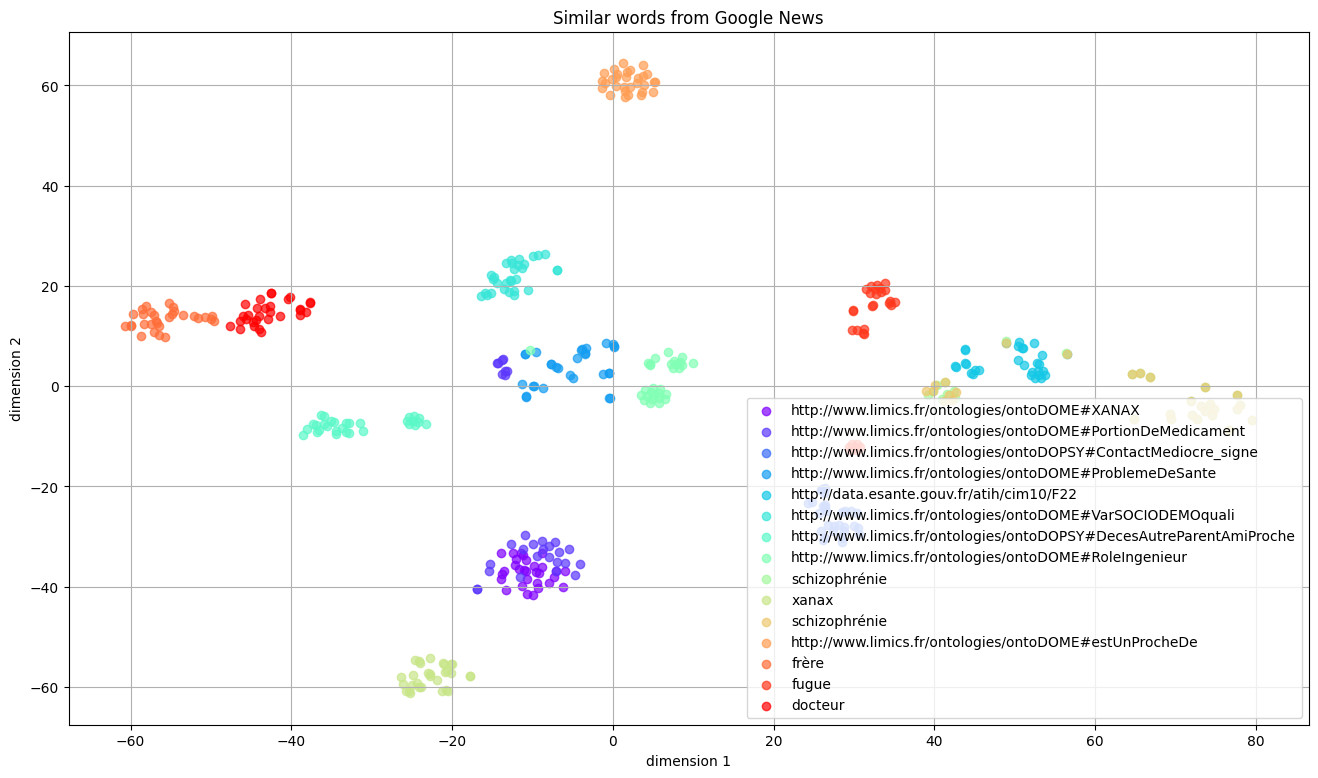

In [28]:
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.grid(True)
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

As explained [above](#tsne) in brief, lets see how the plot varies wrt changing perplexity.

```P = 50```

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/1472278387.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


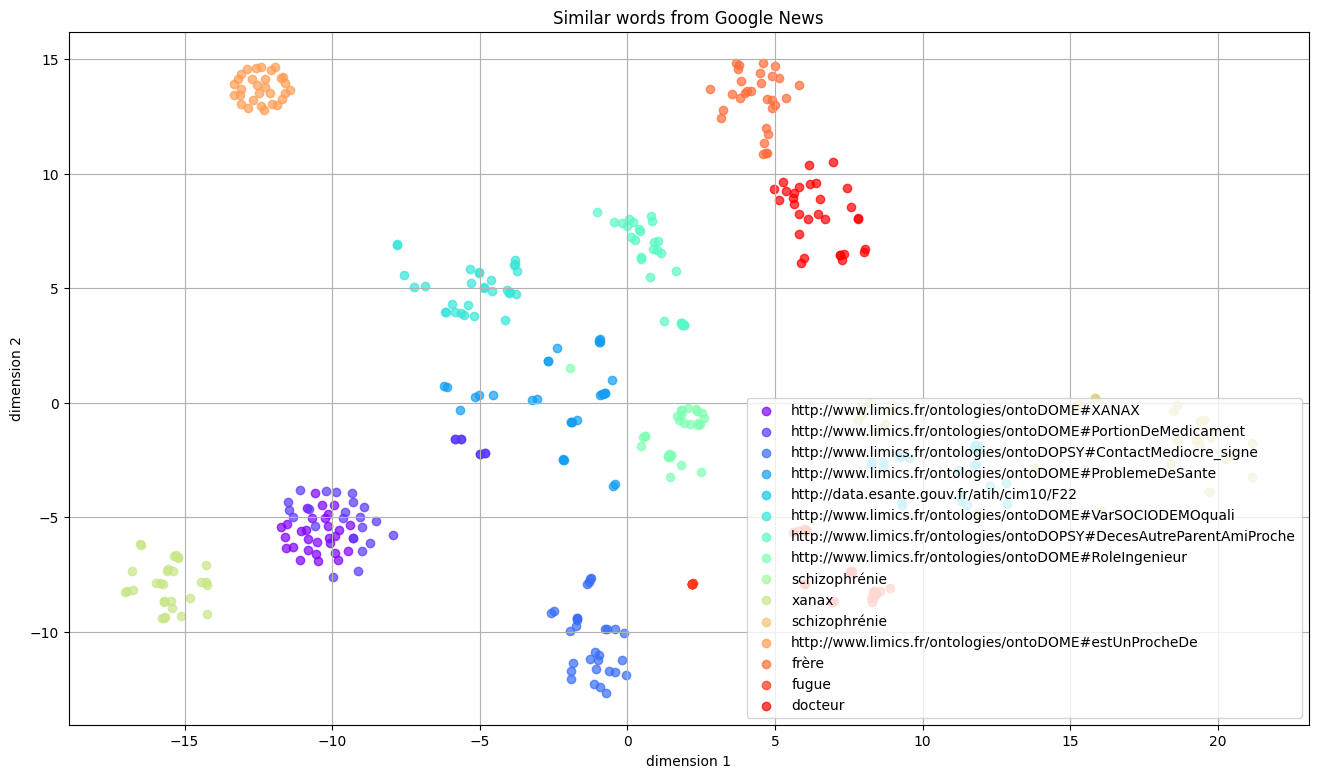

In [29]:
tsne_model_en_2d = TSNE(perplexity=50, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

```P = 100```

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/18404582.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


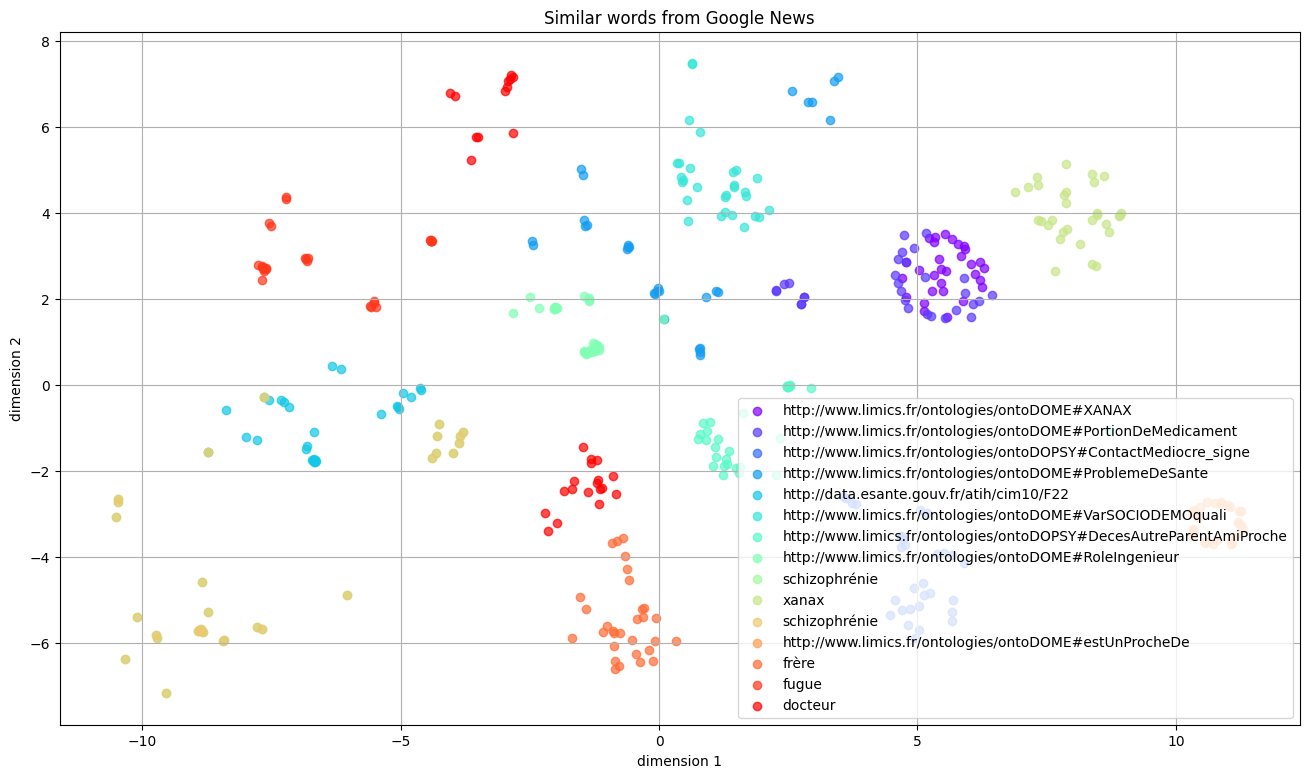

In [30]:
tsne_model_en_2d = TSNE(perplexity=100, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

```P = 200```

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/1499784311.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


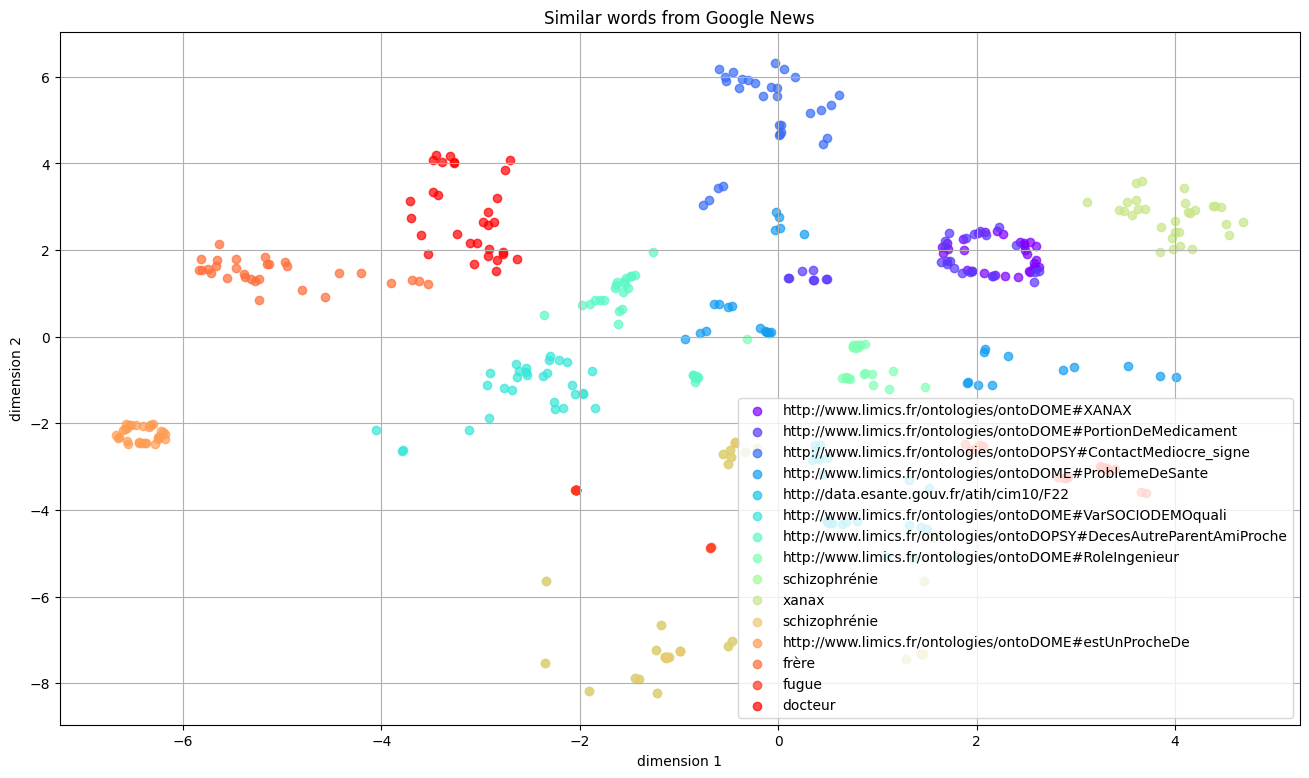

In [31]:
tsne_model_en_2d = TSNE(perplexity=150, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


import matplotlib.pyplot as plt
import matplotlib.cm as cm

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# Visualizing the 3D Embeddings

```P = 500```

/var/folders/3h/7mq2_z6153b8fz44yc7l1klm0000gn/T/ipykernel_7058/1886194633.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, c=color, alpha=a, label=label)  # Plot in 3D


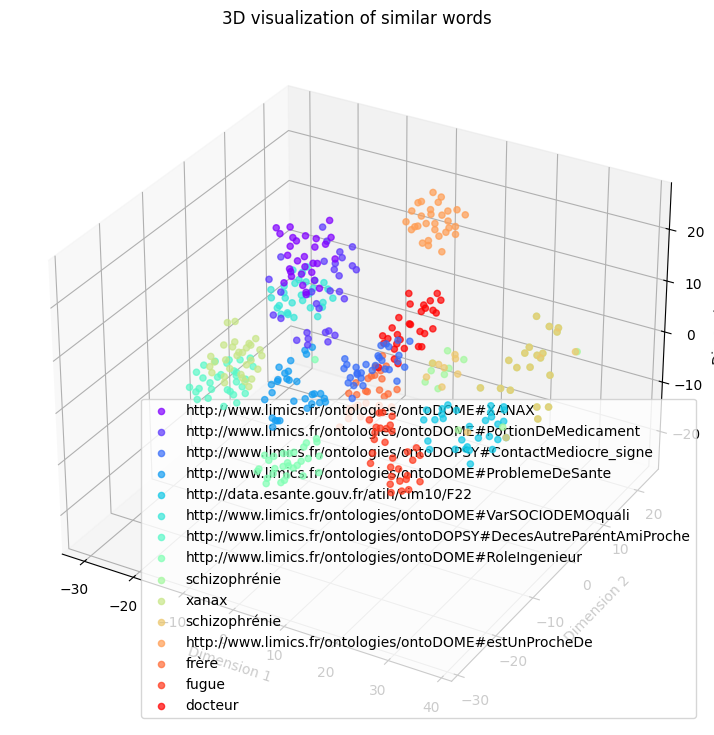

In [32]:
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Your original 3D array of embeddings: embedding_clusters with shape (n, m, k)
n, m, k = embedding_clusters.shape

# Initialize t-SNE with 3 components for 3D visualization
tsne_model_en_3d = TSNE(perplexity=15, n_components=3, init='pca', n_iter=3500, random_state=32)

# Reshape your embeddings to 2D array, fit_transform with t-SNE, and then reshape back to (n, m, 3) for 3D coordinates
embeddings_en_3d = np.array(tsne_model_en_3d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 3)

def tsne_plot_similar_words_3d(title, labels, embedding_clusters, word_clusters, a, filename=None):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')  # Set up a 3D projection
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        z = embeddings[:, 2]  # Extract the z-coordinate for 3D plotting
        ax.scatter(x, y, z, c=color, alpha=a, label=label)  # Plot in 3D
    ax.legend(loc=4)
    ax.set_title(title)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_zlabel("Dimension 3")  # Label for the third dimension
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

# Ensure your t-SNE embeddings are 3D before calling this function
tsne_plot_similar_words_3d('3D visualization of similar words', keys, embeddings_en_3d, word_clusters, 0.7, 'similar_words_3d.png')


**Inference:**

We know that the value of perplexity denotes how many neighbors will affect a point. Consider the 1st case where we set ```P = 15``` , this focuses the attention of t-SNE on preserving the distances to its 15 nearest neighbors and puts virtually no weight on preserving distances to the remaining points. 

Since the subset we chose is smaller, we see the plots starts to uncover the global structure quite well since each point will preserve distances to a large portion of the data set.

**It's the end!**
I hope that you will find this popular tool useful in your tasks!

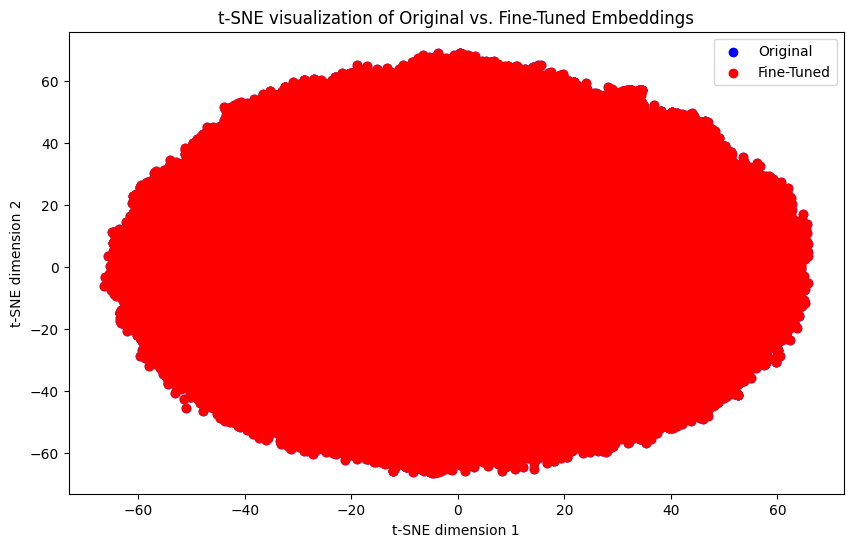

In [35]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# Assuming original_embeddings and fine_tuned_embeddings are your embeddings
# and that they are aligned (i.e., the i-th element in each array corresponds to the same word)
original_embeddings='/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/w2v-fr/wiki+medical_model.word2vec'
fine_tuned_embeddings='/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/cache/output_fr/ontology.embeddings'

original_model = Word2Vec.load("/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/w2v-fr/wiki+medical_model.word2vec")
fine_tuned_model = Word2Vec.load("/Users/oaouina/Applications/pythonProject/OWL2Vec-Star/cache/output_fr/ontology.embeddings")


N = 1000  # Adjust N to your needs
# Assuming you've loaded your models as original_model and fine_tuned_model

# Assuming you want to visualize a subset of words common in both models
common_words = set(original_model.wv.index_to_key).intersection(set(fine_tuned_model.wv.index_to_key))
#print(common_words)
# Extract the vectors for these words from both models
original_vectors = np.array([original_model.wv[word] for word in common_words])
fine_tuned_vectors = np.array([fine_tuned_model.wv[word] for word in common_words])

# Combine the vectors for t-SNE
combined_embeddings = np.vstack((original_vectors, fine_tuned_vectors))

# Create labels for the plot
labels = ['Original'] * len(original_vectors) + ['Fine-Tuned'] * len(fine_tuned_vectors)

# Initialize t-SNE
tsne = TSNE(n_components=3, random_state=42)

# Apply t-SNE to the combined embeddings
reduced_embeddings = tsne.fit_transform(combined_embeddings)

# Plotting
plt.figure(figsize=(10, 6))
for label, color in zip(['Original', 'Fine-Tuned'], ['blue', 'red']):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(reduced_embeddings[indices, 0], reduced_embeddings[indices, 1], c=color, label=label)

plt.legend()
plt.title('t-SNE visualization of Original vs. Fine-Tuned Embeddings')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')
plt.show()

In [34]:
print("I'm done’)

SyntaxError: unterminated string literal (detected at line 1) (2430382148.py, line 1)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Your original 3D array of embeddings: embedding_clusters with shape (n, m, k)
n, m, k = embedding_clusters.shape

# Initialize t-SNE with 3 components for 3D visualization
tsne_model_en_3d = TSNE(perplexity=15, n_components=3, init='pca', n_iter=3500, random_state=32)

# Reshape your embeddings to 2D array, fit_transform with t-SNE, and then reshape back to (n, m, 3) for 3D coordinates
embeddings_en_3d = np.array(tsne_model_en_3d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 3)

def tsne_plot_similar_words_3d(title, labels, embedding_clusters, word_clusters, a, filename=None):
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')  # Set up a 3D projection
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        z = embeddings[:, 2]  # Extract the z-coordinate for 3D plotting
        ax.scatter(x, y, z, c=color, alpha=a, label=label)  # Plot in 3D
    ax.legend(loc=4)
    ax.set_title(title)
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_zlabel("Dimension 3")  # Label for the third dimension
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

# Ensure your t-SNE embeddings are 3D before calling this function
tsne_plot_similar_words_3d('3D visualization of similar words', keys, embeddings_en_3d, word_clusters, 0.7, 'similar_words_3d.png')
